NAME = "Tahmidul Karim Takee"
ID = "20101609"
COLLABORATORS_ID = ["", ""]

# Necessary library import

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt


# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

Height is 999
Width is 749


(-0.5, 748.5, 998.5, -0.5)

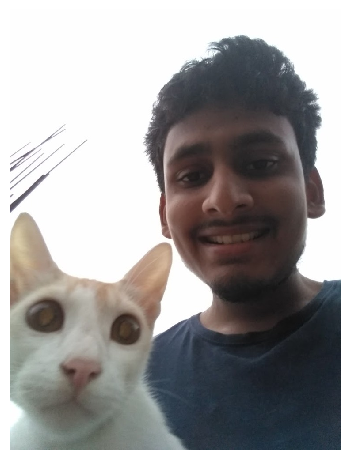

In [ ]:
I = I = io.imread("sample.jpeg") # Replace None with appropriate function call line


# find the height and the width of the image
H = I.shape[0]  # should contain height
W = I.shape[1]  # should contain width
print("Height is", H)
print("Width is", W)

### BEGIN SOLUTION

plt.figure(figsize=(5, 5))
io.imshow(I)
plt.axis("off")

### END SOLUTION

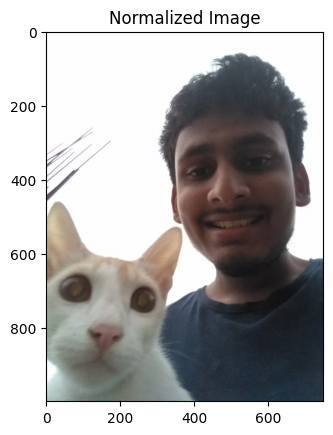

In [ ]:
from skimage import img_as_float


# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I = img_as_float(I)

### BEGIN SOLUTION

plt.imshow(I, cmap='gray', vmin=0, vmax=1)
plt.title("Normalized Image")
plt.show()



### END SOLUTION

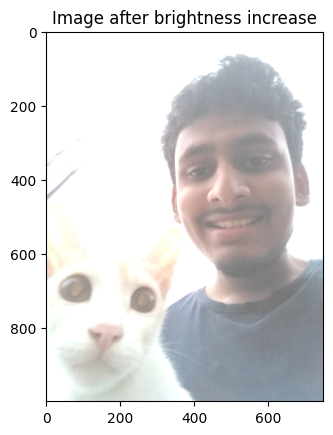

In [ ]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.

I_bright = np.clip(I + 0.4, 0, 1)

### BEGIN SOLUTION

plt.imshow(I_bright, cmap='gray', vmin=0, vmax=1)
plt.title("Image after brightness increase")
plt.show()

### END SOLUTION

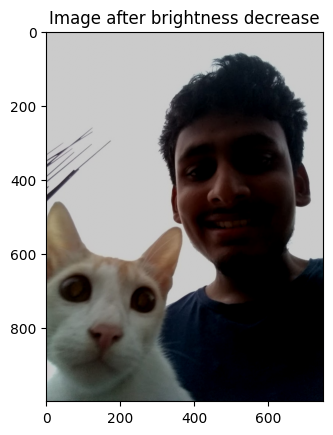

In [ ]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.

I_dark = np.clip(I - 0.2, 0, 1)

### BEGIN SOLUTION

plt.imshow(I_dark, cmap='gray', vmin=0, vmax=1)
plt.title("Image after brightness decrease")
plt.show()

### END SOLUTION

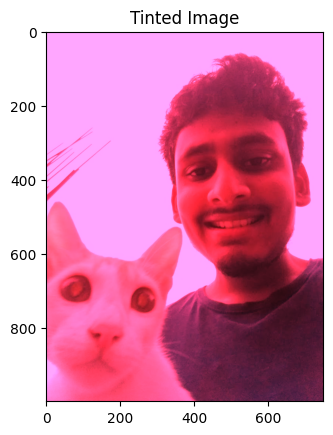

In [ ]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = np.zeros(I.shape)

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION

tint_factors = np.random.uniform(0.3, 3, 3)

I_tint = np.zeros(I.shape)
I_tint[:, :, 0] = I[:, :, 0] * tint_factors[0]
I_tint[:, :, 1] = I[:, :, 1] * tint_factors[1]
I_tint[:, :, 2] = I[:, :, 2] * tint_factors[2]
plt.imshow(I_tint)
plt.title("Tinted Image")
plt.show()

### END SOLUTION

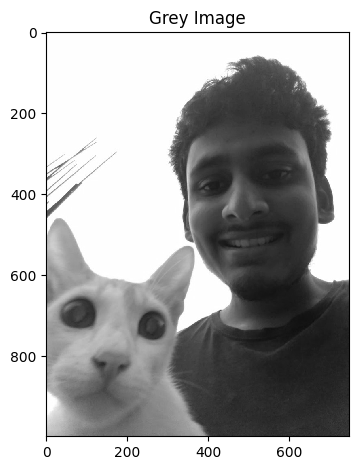

In [ ]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = None

### BEGIN SOLUTION
I_gray = color.rgb2gray(I)
plt.title("Grey Image")
io.imshow(I_gray)
io.show()
### END SOLUTION

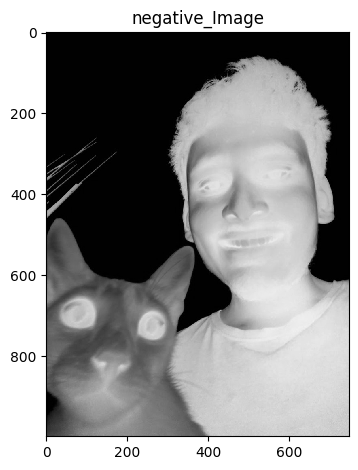

In [ ]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
negative = 1- I_gray
plt.title("negative_Image")
io.imshow(negative)
io.show()
### END SOLUTION

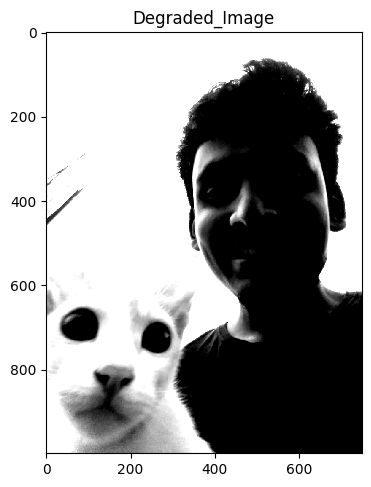

In [ ]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = None

### BEGIN SOLUTION
I_degraded = exposure.rescale_intensity(I_gray, in_range=(0.3, 0.6))
io.imshow(I_degraded)
plt.title("Degraded_Image")
io.show()
### END SOLUTION

In [ ]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    pass
    # Write your code here
    I_stretched = None # replace with appropriate code

    I_stretched = I.copy()

    mask_low = (I <= r1)
    mask_mid = (I > r1) & (I <= r2)
    mask_high = (I > r2)

    I_stretched[mask_low] = I[mask_low] * (s1 / r1)
    I_stretched[mask_mid] = s1 + (I[mask_mid] - r1) * ((s2 - s1) / (r2 - r1))
    I_stretched[mask_high] = s2 + (I[mask_high] - r2) * ((1 - s2) / (1 - r2))

    I_stretched = np.clip(I_stretched, 0, 1)

    return I_stretched

    return I_stretched
    ### BEGIN SOLUTION

    ### END SOLUTION



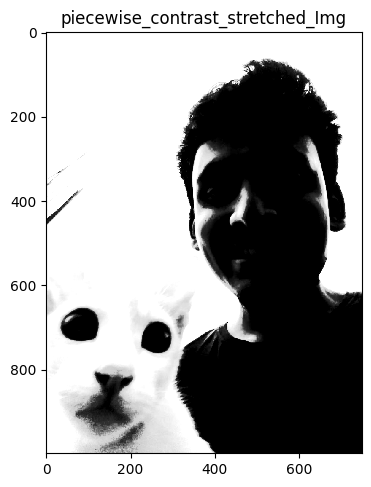

In [ ]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.5
s1 = 0.2
s2 = 0.8
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

# Display the strtched image
io.imshow(I_stretched)
plt.title("piecewise_contrast_stretched_Img")
io.show()
### BEGIN SOLUTION

### END SOLUTION

# Task 2 - Histogram and Equalization

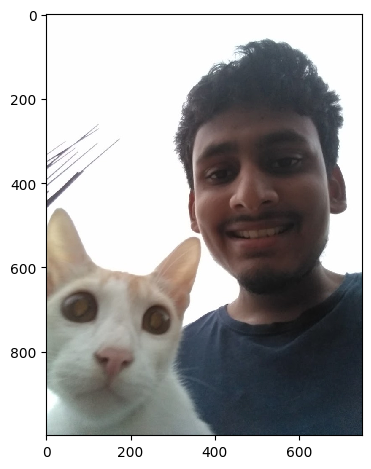

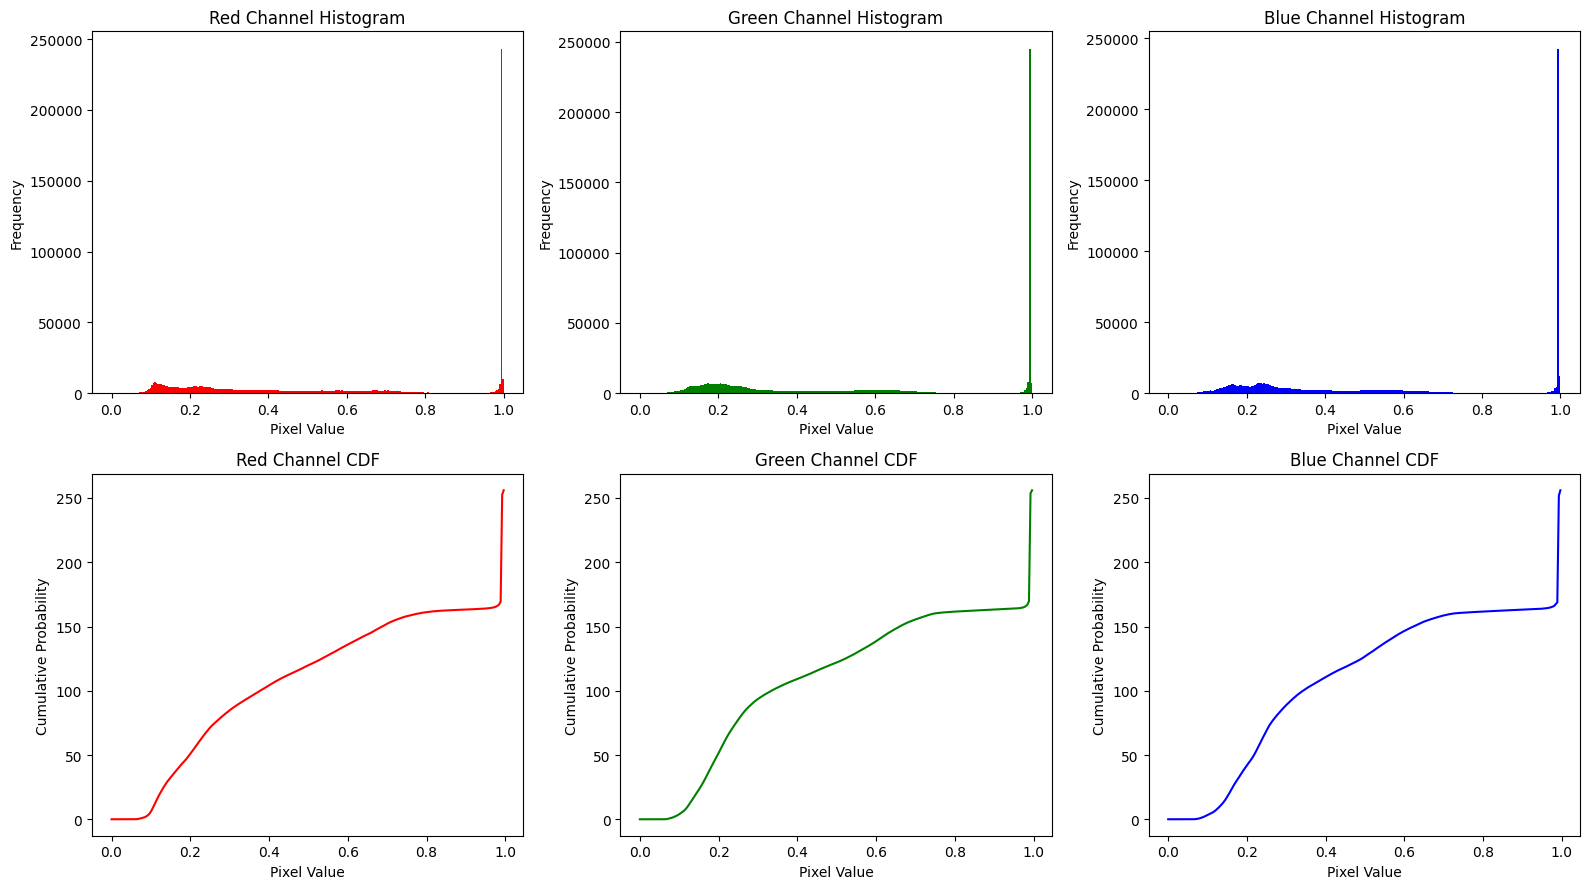

In [ ]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms
io.imshow(I)
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
### BEGIN SOLUTION
for idx, color_label in enumerate(['Red', 'Green', 'Blue']):
    channel_data = I[:, :, idx].ravel()

    axes[0, idx].hist(channel_data, bins=256, range=(0, 1), color=color_label.lower())
    hist_values, bin_edges = np.histogram(channel_data, bins=256, range=(0, 1), density=True)
    cumulative_distribution = hist_values.cumsum()

    axes[0, idx].set_title(f'{color_label} Channel Histogram')
    axes[0, idx].set_xlabel('Pixel Value')
    axes[0, idx].set_ylabel('Frequency')

    axes[1, idx].plot(bin_edges[:-1], cumulative_distribution, color=color_label.lower())
    axes[1, idx].set_title(f'{color_label} Channel CDF')
    axes[1, idx].set_xlabel('Pixel Value')
    axes[1, idx].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

### END SOLUTION

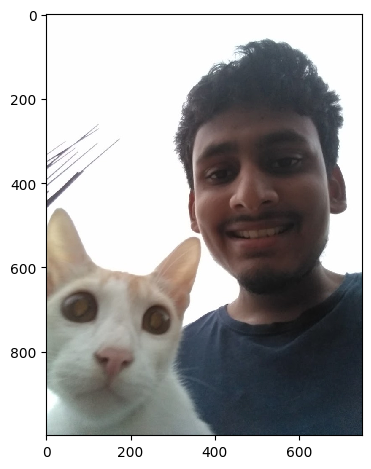

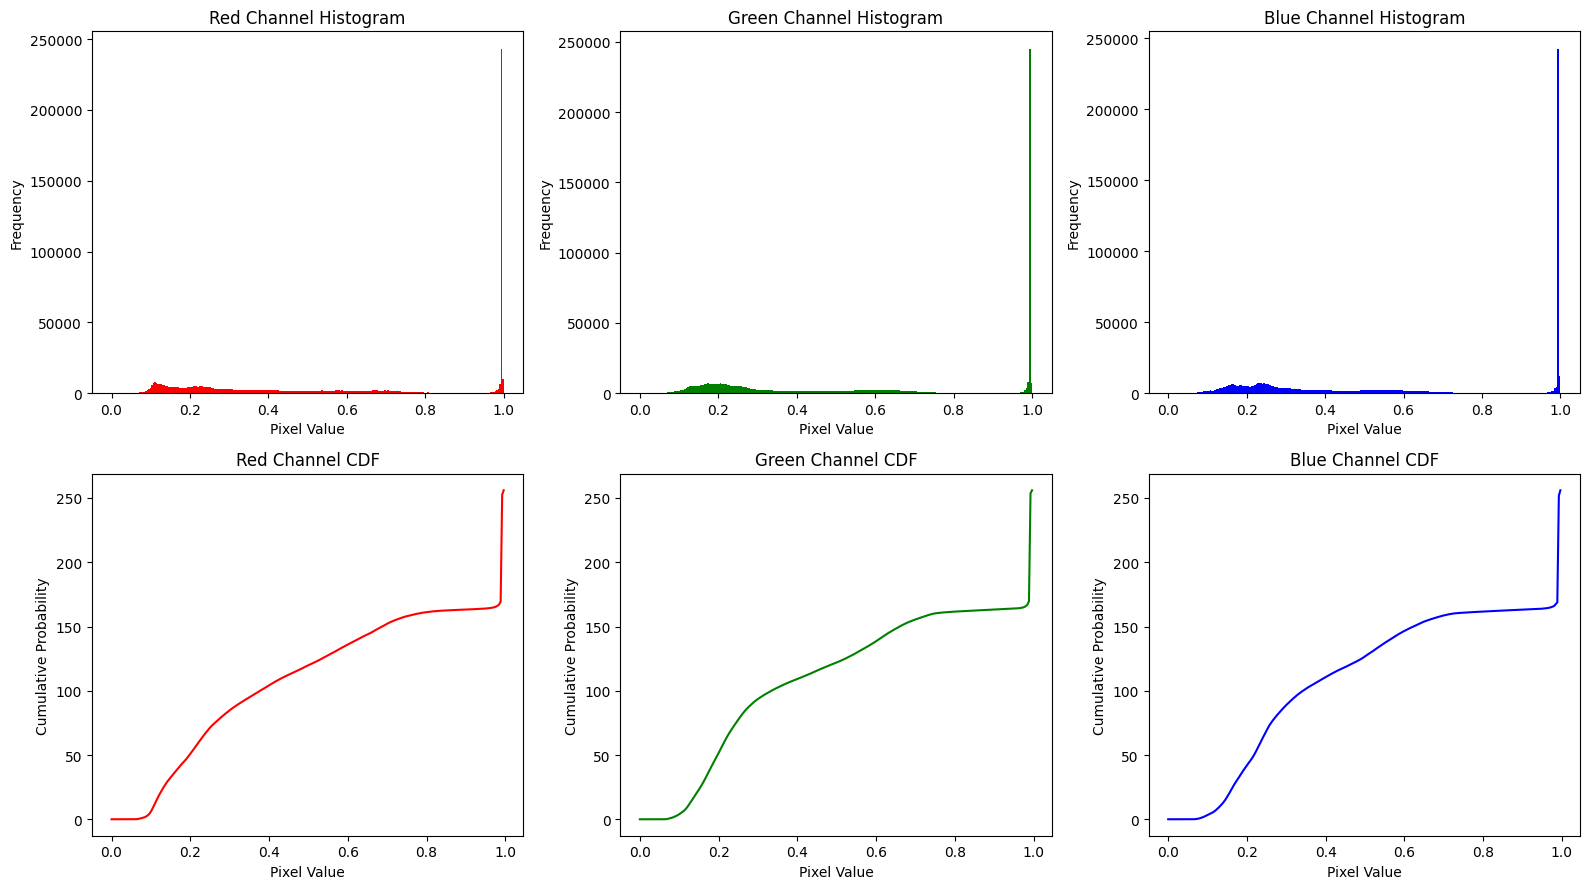

In [ ]:
# Display the original image
io.imshow(I)
io.show()

# Create subplots for histograms and CDFs
fig, axes = plt.subplots(2, 3, figsize=(16, 9))

### BEGIN SOLUTION
# Histograms
for idx, color_label in enumerate(['Red', 'Green', 'Blue']):
    channel_data = I[:, :, idx].ravel()

    axes[0, idx].hist(channel_data, bins=256, range=(0, 1), color=color_label.lower())
    axes[0, idx].set_title(f'{color_label} Channel Histogram')
    axes[0, idx].set_xlabel('Pixel Value')
    axes[0, idx].set_ylabel('Frequency')

# CDFs
for idx, color_label in enumerate(['Red', 'Green', 'Blue']):
    channel_data = I[:, :, idx].ravel()

    hist_values, bin_edges = np.histogram(channel_data, bins=256, range=(0, 1), density=True)
    cumulative_distribution = hist_values.cumsum()

    axes[1, idx].plot(bin_edges[:-1], cumulative_distribution, color=color_label.lower())
    axes[1, idx].set_title(f'{color_label} Channel CDF')
    axes[1, idx].set_xlabel('Pixel Value')
    axes[1, idx].set_ylabel('Cumulative Probability')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()
### END SOLUTION


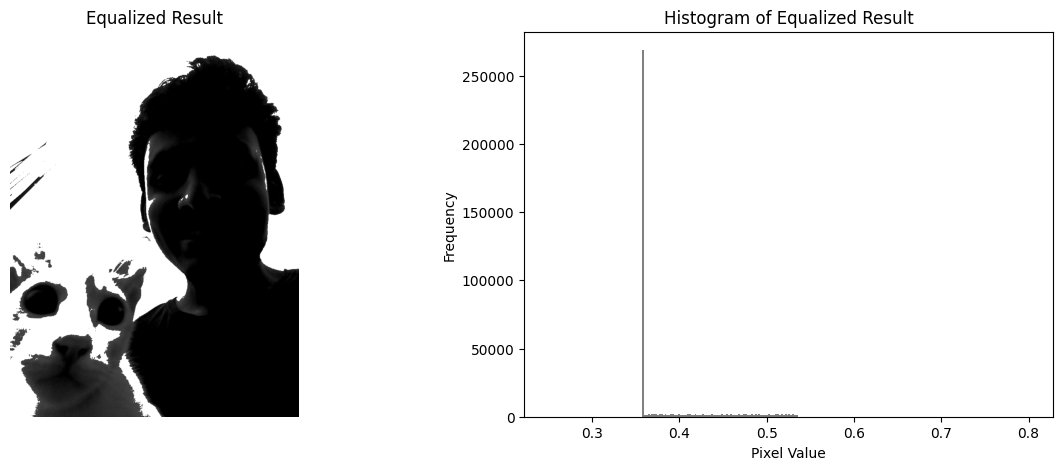

In [ ]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
I_result_gray = exposure.equalize_hist(I_degraded)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(I_result_gray, cmap='gray')
axs[0].set_title('Equalized Result')
axs[0].axis('off')

axs[1].hist(I_result_gray.ravel(), bins=256, range=(0.25, 0.8), color='gray')
axs[1].set_title('Histogram of Equalized Result')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')
plt.show()
### END SOLUTION

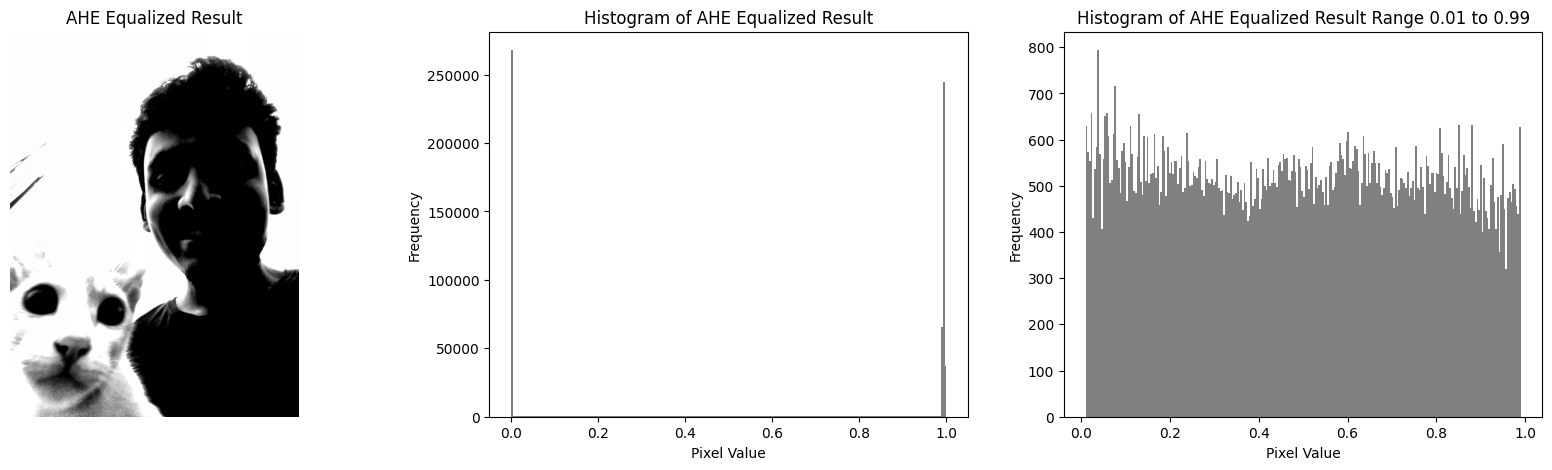

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = None

### BEGIN SOLUTION
I_result_2 = exposure.equalize_adapthist(I_degraded)
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

axs[0].imshow(I_result_2, cmap='gray')
axs[0].set_title('AHE Equalized Result')
axs[0].axis('off')

axs[1].hist(I_result_2.ravel(), bins=256, range=(0, 1), color='gray')
axs[1].set_title('Histogram of AHE Equalized Result')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(I_result_2.ravel(), bins=256, range=(0.01, 0.99), color='gray')
axs[2].set_title('Histogram of AHE Equalized Result Range 0.01 to 0.99')
axs[2].set_xlabel('Pixel Value')
axs[2].set_ylabel('Frequency')

plt.show()
### END SOLUTION

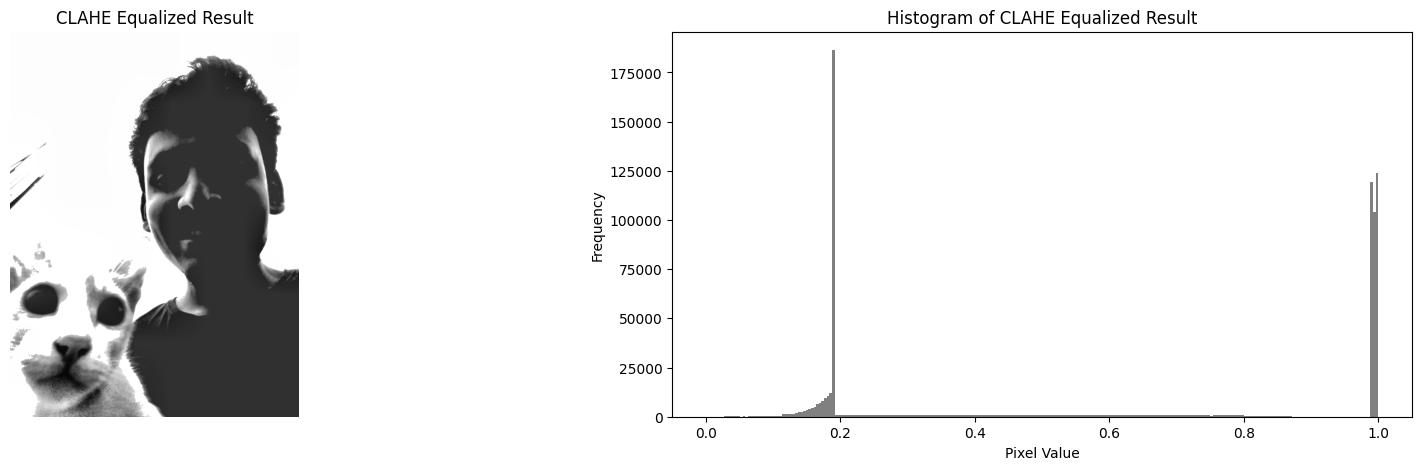

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram


### BEGIN SOLUTION
I_result_clahe = exposure.equalize_adapthist(I_degraded, clip_limit=0.2)
fig, axs = plt.subplots(1, 2, figsize=(21, 5))

axs[0].imshow(I_result_clahe, cmap='gray')
axs[0].set_title('CLAHE Equalized Result')
axs[0].axis('off')

axs[1].hist(I_result_clahe.ravel(), bins=256, range=(0, 1), color='gray')
axs[1].set_title('Histogram of CLAHE Equalized Result')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

plt.show()
### END SOLUTION

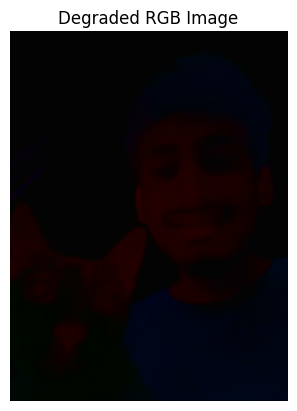

In [ ]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it

I_rgb_degraded = None

### BEGIN SOLUTION
from skimage import color

image_rgb = io.imread("sample.jpeg")

image_lab = color.rgb2lab(image_rgb)

L_channel = image_lab[:, :, 0]
low_limit = 0.3
high_limit = 0.6

L_channel_degraded = exposure.rescale_intensity(L_channel, in_range=(low_limit, high_limit))

image_lab_degraded = image_lab.copy()
image_lab_degraded[:, :, 0] = L_channel_degraded

I_rgb_degraded = color.lab2rgb(image_lab_degraded)

plt.imshow(I_rgb_degraded)
plt.title('Degraded RGB Image')
plt.axis('off')
plt.show()
### END SOLUTION

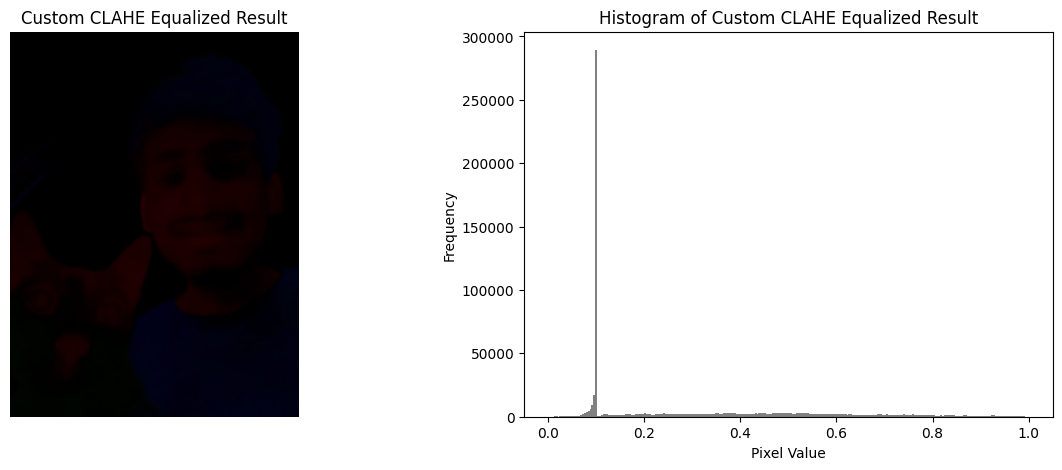

In [ ]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I_recon_color = None

### BEGIN SOLUTION
I_lab_degraded_custom = color.rgb2lab(I_rgb_degraded)
L_channel_degraded_custom = I_lab_degraded_custom[:, :, 0]
L_channel_normalized_custom = (L_channel_degraded_custom - np.min(L_channel_degraded_custom)) / (np.max(L_channel_degraded_custom) - np.min(L_channel_degraded_custom))
clahe_result_custom = exposure.equalize_adapthist(L_channel_normalized_custom, clip_limit=0.1)
I_lab_recon_custom = I_lab_degraded_custom.copy()
I_lab_recon_custom[:, :, 0] = clahe_result_custom
I_recon_color_custom = color.lab2rgb(I_lab_recon_custom)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I_recon_color_custom)
axs[0].set_title('Custom CLAHE Equalized Result')
axs[0].axis('off')
axs[1].hist(clahe_result_custom.ravel(), bins=256, range=(0, 1), color='gray')
axs[1].set_title('Histogram of Custom CLAHE Equalized Result')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')
plt.show()

### END SOLUTION

# Task 3 - Open Ended
 ## ***There are 3 images in the drive directory below. Look at the questions from the brackets [.]. Answer them in the provided text cell at the bottom.***

 ### link:  https://drive.google.com/drive/folders/1ft3XrO-MGxhxL2PfcLCFQjU0wvvlLAv4?usp=sharing

In [ ]:
# Dark_Room.jpg = very dark [The windows are on walls. How does the wall look like?]
# Foggy_Road.jpg = washed out/foggy [How many vehicles do you think there are?]
# Read_the_code.jpg = Dark RGB Barcode [What is hidden in the Barcode?
#                                       Make it scanable, scan it and say something about the hidden message.]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION

### END SOLUTION

### Your answers:

abc abc abc ... ...

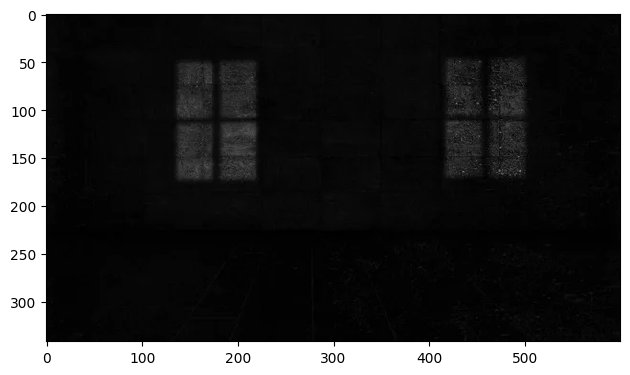

In [ ]:
room = io.imread('Dark_Room.jpg')
io.imshow(room)

In [ ]:
room = room/np.max(room)
room = room+0.3


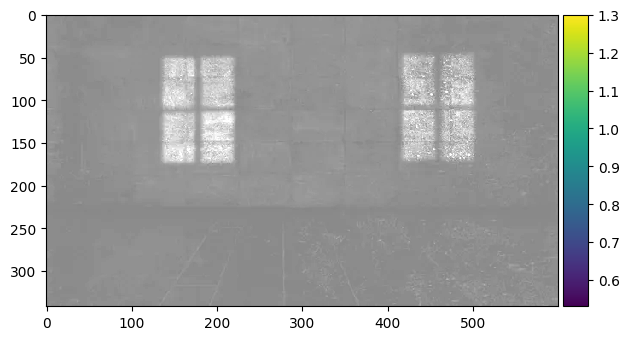

In [ ]:
io.imshow(room)

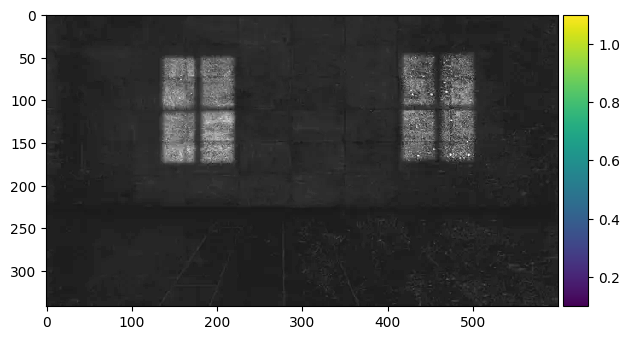

In [ ]:
image= io.imread("Dark_Room.jpg")
#image = np.linspace(0, 1, 256 * 256).reshape(256, 256)
image= image/255
# Perform contrast stretching
stretched_image = (image - image.min()) / (image.max() - image.min())
stretched_image = stretched_image+0.1
io.imshow(stretched_image)

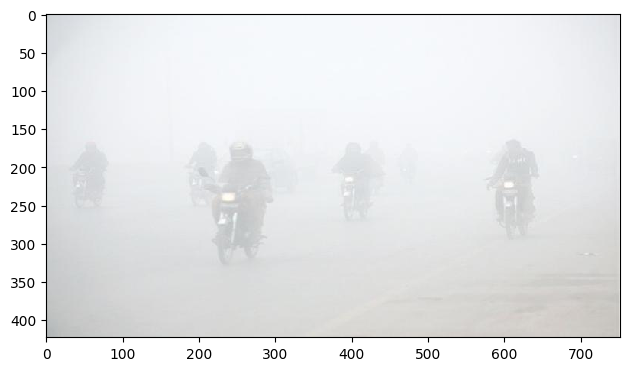

In [ ]:
fog = io.imread("Foggy_Road.jpg")
io.imshow(fog)
fog = fog/255.0


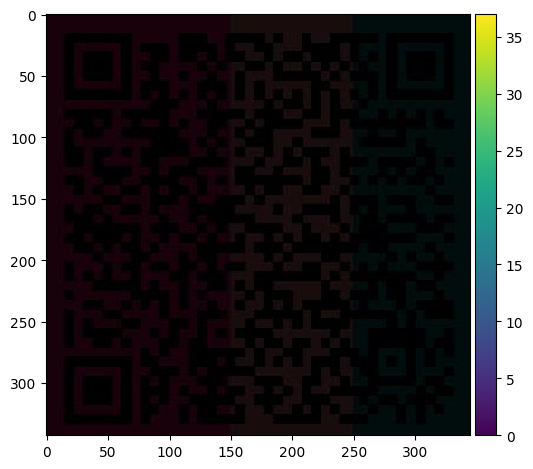

In [ ]:
code = io.imread("Read_the_code.jpg")
io.imshow(code)
fog = fog/255.0